# Linear Regression

In this lab, we will explore the fundamental underpinnings of linear algebra we have hinted at for the last several classes: linear combinations of vectors. This lab has two parts spread over two weeks. 

The fundamental questions we are trying to understand is: What is the space of linear combinations of $n$ arbitrary vectors $v_1,\ldots, v_n$?

Start this lab from the point marked 10/7: New material begins here.



In [8]:
%matplotlib inline
import numpy as np
import numpy.random as npr

# For plotting

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


The dot product of each row of u with (-1,-1,1) is respectively: 
 [[0]
 [0]]


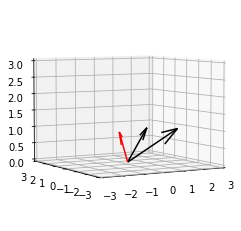

In [9]:
## This is old, run this to refresh your memory

# We now look at two vectors (2,-1,1) and (1,0,1)

u = np.array([[2, -1, 1],[1,0,1]])

# Let us plot these vectors:

# zip below reads u row-wise and assigns in turn to X, Y, Z. So X contains
# 1st coordinate of the two vectors, Y contains the 2nd coordinate
# and Z contains the 3rd coordinate. print(X) below 
# to see what has happened with the zip command. 
X, Y, Z = zip(*u)

print('The dot product of each row of u with (-1,-1,1) is respectively: \n', u @ np.array([[-1],[-1],[1]]))

origin = [[0],[0],[0]]

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.quiver(*origin, X, Y, Z, color=['black','black'])
plt.quiver(*origin, -1, -1, 1,color=['red'])

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])
ax.view_init(5,240)


### This is old, run this to refresh your memory

We will plot the set of all linear combinations of the two vectors above. We should be getting a plane
of course, but let us do it and see for ourselves. If ${\bf u}_1$ is the vector in the first row above, and ${\bf u}_2$
the vector in the second row, we will plot all vectors in the set
$$ \bigl\{  w_1 {\bf u}_1 + w_2 {\bf u}_2 : -2 \le w_1 \le 2 \textrm{ and } -2 \le w_2 \le 2 \bigr\}.$$
You can of course plot more points if you wish, but these should give us a pretty good idea.

A couple of points below. If we think of ${\bf u}_1$ and ${\bf u}_2$ as row vectors, then
$$ \begin{bmatrix} w_1 & w_2 \end{bmatrix} \begin{bmatrix} {\bf u}_1 \\ {\bf u}_2 \end{bmatrix} = w_1 {\bf u}_1 + w_2 {\bf u}_2. $$
Our implementation will exploit this.

We will plot all the vectors of the set above as a surface. python requires that we arrange each of the x, y and z coordinates
of these points as a matrix, and the use of meshgrid and the particular array sizes below reflect that constraint.

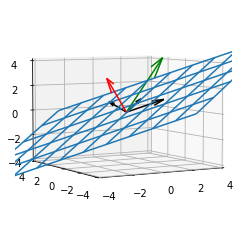

In [10]:
## This is old, run this to refresh your memory

# the following creates a grid of 100*100 
# values in the rectangle with corners (-3,-3)
# (-3,3), (3,3) and (3,-3). The x co-ordinates
# of all the points are assigned to w1 (a 100x100 matrix), the
# y coordinates to w2 (another 100x100 matrix).

x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)

w1,w2 = np.meshgrid(x,y)

# we are eseentially looking at the linear combination
# of the rows of u for all coefficients -3 \le w1 \le 3
# (obtained by meshgrid above) and -3 \le w2 \le 3.

W = np.stack((w1,w2),axis=2)
ptsonplane = ( W @ u )

# ptsonplane is a 100x100 stack of 3 co-ordinate vectors. 
# The first, second and third coordinates are the x-, y-
# and z- coordinates respectively of the 100x100 points.

Xp = ptsonplane[:,:,0]
Yp = ptsonplane[:,:,1]
Zp = ptsonplane[:,:,2]

origin = [0],[0],[0]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(Xp, Yp, Zp,rstride=20,cstride=10)
plt.quiver(*origin, X, Y, Z, color=['black','black'])

# We also plot the vector perpendicular to the plane: (1,1,-1) (scaled by -3 for better visualization)
# Note that this plane can be represented by (1,1,-1) dot w = 0.

plt.quiver(*origin, -3, -3, 3, color=['red'])

# Note that (1,1,-1) dot (-2, 5, 3) =0, so (-2,5,3) must lie on the plane as well. Sure enough it does.

plt.quiver(*origin, -2/4, 5/4, 3/4, color=['black'])
plt.quiver(*origin, 5,4,4, color=['green'])
ax.set_ylim([-4,4])
ax.set_xlim([-4,4])
ax.set_zlim([-4,4])

# Note from the view at this angle, the three black vectors are on the plane, the red and green are outside the plane.
ax.view_init(5,240)
plt.draw()

## This is old, run this to refresh your memory

Now we have the three vectors (2,-1,1), (1,0,1) and (-2, 5,3), all of which are on the plane (the black vectors).
We want to see if (5,4,4) (the green vector) can be written as a linear combination of these vectors. Equivalently,
we ask if
$$ w_1 \begin{bmatrix} 2\\-1\\1 \end{bmatrix}+ w_2 \begin{bmatrix} 1\\0\\1\end{bmatrix} + w_3 \begin{bmatrix} -2 \\5\\3\end{bmatrix}$$
can ever equal (5,4,4) for some values of $w_1,w_2,w_3$. Of course, the vector (5,4,4) dot (1, 1, -1) != 0, so (5,4,4) 
does not lie on the plane above. Any linear combination of the vectors in the equation above can only lie on the blue plane, and never ever leave it. So we conclude that no matter what values of $w_1,w_2, w_3$ we choose, we will not be able to represent (5,4,4) as the linear combination in the equation above.

Completely equivalent is asking if the following set of equations has a solution:

\begin{align*}
2 w_1 - 1 w_2 - 2 w_3 &= 5 \\
-1 w_1 + 0 w_2 + 5 w_3 &= 4 \\
 1 w_1 + 1 w_2 + 3 w_3 &= 4
\end{align*}

The answer again is no. 
 
If the right side of the last equation were changed to 9, we would have solutions---in fact, infinitely many of them. Explain why in a separate cell below. 



First, note that since (-2,5,3) lies in the plane formed by (2,-1,1) and (1,0,1), we can write for some numbers a_1 and a_2

(-2,5,3) = a_1 (2,-1,1) + a_2 (1,0,1).

In fact, it is easy to find a_1 and a_2 by elimination. YOu will get a unique solution a_1 = -5 and a_2 =8. So

(-2,5,3) = -5 (2,-1,1) + 8 (1,0,1).

We will rewrite the above as follows:

(0,0,0) = -5 (2,-1,1) + 8(1,0,1) -2 (-2,5,3).                  (*)

Now, notice that (5,4,9) also belongs to the plane formed by (2,-1,1) and (1,0,1). In fact, again elimination will show you that there is the following unique way to write (5,4,9) as a linear combination of the two vectors.

(5,4,9) = -4 (2, -1, 1) + 13( 1,0, 1).                         (**)

But if we want to write (5,4,9) as a linear combination of (2,-1,1), (1,0,1) and (-2,5,3), we can add any constant alpha times Equation(*) to Equation(**) to get:

(5,4,9) = (-4 -5*alpha ) (2,-1,1) + (13+8*alpha) (1,0,1) - (2*alpha) (-2,5,3),

The above equation holds no matter what real number alpha is (plug in different values and double check). Thus, since there are infinite choices for alpha, there are infinite ways to write (5,4,9) as a linear combination of (2,-1,1), (1,0,1) and (-2,5,3).

## This is old, run this to refresh your memory

In the above case, we had the magic vector (1,1,-1) that was perpendicular to both (2,-1,1) and (1,0,1). What if we did not? If we want to see if a third vector belongs to the same plane as the first two, how would we do it? The answer is simple---we see if the third vector is a linear combination of the first two or in other words, we solve a set of equations. Let us see how we would do this below. Consider vectors (1, 2, 3) and (-1, 4, 2). Draw the plane corresponding to all linear combinations of the above vector by reusing the code from above. ** You have done this in the last lab, no need to do it again **

## This is old, run this to refresh your memory

Let us now check if the vector (2,10,2) belongs to the plane above. To do so, we see if there are numbers $w_1$ and $w_2$ such that 
$$ w_1 \begin{bmatrix} 1\\2\\3\end{bmatrix} +w_2 \begin{bmatrix} -1\\4\\2\end{bmatrix} = \begin{bmatrix} 2\\10\\2\end{bmatrix}$$

We know how to solve the equations above---by elimination. First we kill the coefficients of $w_1$ in the second and third equations. Find the matrices that do the elimination---to get you started, in the cell below I have eliminated the coefficient of $w_1$ in the second equation above. ** Again, done in the last class, no need to do it again **

In [11]:
## This is old, run this to refresh your memory

A = np.array([[1,2,3],[-1,4,2]]).T
b = np.array([2,10,2]).reshape(3,1)

# Pivot 1 = 1
# To eliminate the coefficient of w_1 in equation 2:
# subtract 2 times first equation from the second. Recall that this is 
# done by multiplying on the left by the following matrix---the 
# first row says we take 1 (1,-1)+0 (2.4) + 0(3,2) as the first row
# of the product, which is (1,-1). The second row asks us to take
# -2(1,-1)+1(2,4)+0(3.2) as the second row of the product. and so on
# as we discussed in class.

E1 = np.array([[1,0,0],[-2,1,0],[0,0,1]])

# We now have the new set of equations: A1 w = b1 where w is the column vector with w_1 and w_2,
# and A1, b1 given by the equations:

A1 = E1 @ A
b1 = E1 @ b

# verify that the coefficient of w_1 in the second equation is 0:
print('A1=\n',A1,'\nb1=\n',b1)

# Similarly write E2 that will kill the coefficient of w_1 in equation 3 below, and write out
# the new set of equations resulting from the elimination.

E2 = np.array([[1,0,0],[0,1,0],[-3,0,1]])

A2 = E2 @ A1
b2 = E2 @ b1

print('A2=\n',A2,'\nb2=\n',b2)

A1=
 [[ 1 -1]
 [ 0  6]
 [ 3  2]] 
b1=
 [[2]
 [6]
 [2]]
A2=
 [[ 1 -1]
 [ 0  6]
 [ 0  5]] 
b2=
 [[ 2]
 [ 6]
 [-4]]


Then you have to kill the coefficient of $w_2$ in the third equation. At that point, you will see if the resultant third equation. If that is consistent (meaning you get 0 =0 or something like that), you are good to go and you can find the solution by back substitution. If not, you have no solution and (2,10,2) does not lie in the plane. Continue in the cell below and find out if (2,10,2) lies in the plane.

In [12]:
## This is old, run this to refresh your memory
E3 = np.array([[1,0,0],[0,1,0],[0,-5/6,1]])

A3 = E3 @ A2
b3 = E3 @ b2

print('A3=\n',A3,'\nb3=\n',b3)

A3=
 [[ 1. -1.]
 [ 0.  6.]
 [ 0.  0.]] 
b3=
 [[ 2.]
 [ 6.]
 [-9.]]


## This is old, run this to refresh your memory

At this point, the last equation reads 0w_1 + 0 w_2 = 9, or that 0 =9. This is clearly not possible. We conclude that there are no solutions for the set of equations, or that (2,10,2) does not lie on the plane formed by (1,2,3) and (-1,4,2).

## This is old, run this to refresh your memory

If (2,10,2) does not belong to the plane formed by (1,2,3) and (-1,4,2), how can you change the last entry of the target (2,10,2) so that it lies in the plane? Namely find x such that (2,10,x) lies in the plane formed by (1,2,3) and (-1,4,2). ** Done last class, no need to do this again **

Hint: pick the value that makes the last equation consistent.

Note that E3^{-1}, the operation that undoes E3, is simply to add back 5/6 row2 to row3. Therefore,
\begin{bmatrix}
1&0 & 0 \\
0 & 1 & 0 \\
0 & 5/6 & 1
\end{matrix}
Similarly, for E2 and E1.

If b3 above were (2,6,0) instead of (2,6,-9), we would have had solutions. 
Now note that the value of x only affects the
third row of the product, not the first two. Therefore, changing the
third element of b, ie from (2,10,2) to (2,10,x) makes no change for 
the first two elements of b3. But we want the last element of b3 to 
be 0, so we write:

(2,6,0) = E3 @ E2 @ E1 @ (2,10,x)

or (2,10,x) = inv(E1) @ inv(E2) @ inv(E3) @ (2,6,0)

The code does this below (invE1 and invE2 are also obtained as we discussed for invE3), and finds out that x =11.

In [6]:
## This is old, run this to refresh your memory

invE1 = np.array([[1,0,0],[2,1,0],[0,0,1]])
invE2 = np.array([[1,0,0],[0,1,0],[3,0,1]])
invE3 = np.array([[1,0,0],[0,1,0],[0,5/6,1]])

b = invE1 @ invE2 @ invE3 @ np.array([2,6,0]).reshape(3,1)
print(b)


[[ 2.]
 [10.]
 [11.]]


## This is old, run this to refresh your memory

After elimination, we now have A3 @ (w1,w2) = (2,6,0). The last equation just says 0=0 and can be discarded. The second equation is 

6w_2 = 6, 

or w_2 =1. The first now reads 

w_1-w_2 = 2,

from which we get w_1 = 3.

## Thu 10/7 New material for lab starts here. 

Last class, we wrote the matrices for generating permutation of rows and for doing elementary row operations---here they are. You will use these functions for your later problems."

In [13]:
def P(r1,r2,m):
    # given a matrix with m rows, swap row r1 and r2
    # check if r1 <= m, r2 <= m and r1 != r2
    if r1 > m or r2 > m or r1 == r2:
        return('must satisfy: r1 < r2 \le m')
    p = np.zeros([m,m])
    for j in range(r1):
        p[j,j]=1
    p[r1,r2] = 1
    for j in range(r1+1,r2):
        p[j,j]=1
    p[r2,r1] =1
    for j in range(r2+1,m):
        p[j,j]=1
    return(p)

def E(r1,r2,m,alpha):
    # in a matrix with m rows, row r2 is updated to be (oldrow r2) - alpha (row r1)
    # Also check if alpha is a number, else throw an exception
    e = np.zeros([m,m])
    for j in range(m):
        e[j,j] = 1
    if not r1 == r2:
        e[r2,r1] = -alpha
    return(e)

def discardZeroCol(A):
    # you may not need this, but included just in case.
    def chkmatrix(Z):
        # Checks if Z is a matrix. If yes, returns shape else returns 0.        
        if isinstance(Z,np.ndarray):
            if len(Z.shape)==2:
                return(Z.shape)
        return(0)
    
    if not chkmatrix(A):
        print('A must be a matrix')
        return(0)
    
    # we check if some col of A has length < 10^{-15}, an arbitrary threshold.
    m,n = chkmatrix(A)
    discardlist = []
    for i in range(n):
        if np.dot(A[:,i],A[:,i]) < (10** -15):
            discardlist.append(i)
    
    newA = np.array([A[:,i] for i in range(n) if i not in discardlist]).T
    return(newA)



The following function implements the pivot algorithm.

Specifically, if A is a square matrix of size mxn, it determines if there are min(m,n) (non-zero) pivots using the
following psuedocode:

pivot(A, pivotlist):
    if A[0,0] != 0:
        ;
    else: 
       if A[j,0] != 0 for some j:
           swap rows j and 0
    # Note: if entire col is 0, we append a 0 for the pivot
    pivotlist.append(A[0,0])
    # recursively call after discarding the first row and col
    pivotlist = pivot(A[[1:m], [1:n], pivotlist)
    return(pivotlist)
    
Now pivotlist in the above has the correct non-zero pivot in every column that does have a pivot, but has a 0 where no pivots are available. 

In [14]:
P(2,3,4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [8]:
def chkmatrix(Z):
    # Checks if Z is a matrix. If yes, returns shape else returns 0.        
    if isinstance(Z,np.ndarray):
        if len(Z.shape)==2:
            return(Z.shape)
    return([0,0])

# The following returns all possible pivots in A. To use, call pivots(A,[],1)

def pivots(A, priorlist, originalcall):
    tol = 10** (-15)
    m,n = chkmatrix(A)
    
    if m == 0:
        # no additional pivots
        return(priorlist)
    
    if m == 1:
        # only one row at this stage
        priorlist.append(A[0,0])
        return(priorlist)
    
    if m > 1:
        if A[0,0] < tol:
            A[0,0]=0
            for j in range(1,m):
                if not A[j,0] < tol:
                    A= P(0,j,m) @ A   
                    break
        priorlist.append(A[0,0])
        
        # eliminate all elements below first pivot in col 1
        pivot = A[0,0]
        if pivot > tol:
            for i in range(1,m):
                alpha = A[i,0]/pivot
                A = E(0,i,m,alpha) @ A

        # discard first row and first column
        reducedA = A[range(1,m),:]
        reducedA = reducedA[:,range(1,n)]
        
        # recursively call for the next pivot, note we pass originalcall=0 now 
        priorlist=pivots(reducedA, priorlist,0)
    
    if originalcall ==1:
        minimum = np.min(np.abs(priorlist))
        r = np.min([m,n])
        numpivots = np.sum(np.where(np.abs(priorlist) > tol, 1, 0))
        if minimum > tol:
            print('Full set of',r,'pivots\n')
        else:
            print('Fewer than',r,'pivots. Number of pivots = ',numpivots )
    return(priorlist)
    
A=npr.randint(0,2,[200,200]).T
pivots(A,[],1)


Full set of 200 pivots



[1,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 1.3333333333333333,
 1.0000000000000004,
 3.75,
 1.2000000000000002,
 1.0,
 0.6111111111111116,
 0.4999999999999998,
 1.0909090909090955,
 12.805555555555491,
 6.486984815618218,
 4.974641921640754,
 3.9727761595339457,
 1.5951214720139928,
 0.5995191017764977,
 0.6706491630271666,
 4.957602487456885,
 0.17686622989800055,
 17.54647574746732,
 0.47354768149796356,
 15.770337466774599,
 0.7264417255602797,
 2.131174795972293,
 4.728177805297678,
 3.71358522766403,
 18.62447324514438,
 1.451185004052749,
 1.0797053032538795,
 3.9908623330172825,
 12.041394037650516,
 19.544849141091916,
 1.5649230147108937,
 0.731581842050099,
 12.519439549087757,
 4.899700911637747,
 3.7174719077702276,
 0.43799836414806964,
 5.4251906505394505,
 1.4172706583979617,
 0.07633795832367118,
 708.0560795851355,
 0.6857383002138544,
 15.611310688546308,
 3.6100176956650394,
 69.09505644856199,
 10.25560698494639,
 2.6952047175271505,
 2.3743162766054535,
 17.632595144

In [20]:
import numpy as np

"""
Given:  Matrix, row1, and row2
Return: Swaps row1 and row2
"""
def matrixrowswap(mat,r1,r2):
    mat[[r1,r2]] = mat[[r2,r1]]
    return mat

"""
Given:  Matrix, row, and scalar
Return: Multiply row by a scalar
"""
def matrixrowmx(mat,r1,a):
    mat[[r1]] = mat[r1,:]*a
    return mat

"""
Given:  Matrix, row1, row2 and scalar
Return: row2 <- row2 - Scalar(Row1)
"""
def matrixrowmadd(mat,r1,a,r2):
    mat[[r2]] = a*mat[[r1]] + mat[[r2]]
    return mat

"""
Given:  Matrix
Return: performs elementary row ops to put 1s on diagonal
"""
def elim(mat, b=None, pv=None):
    
    o_mat = mat.copy() 
    
    # Get dimension of the matrix
    row = mat.shape[0]
    column = mat.shape[1]

    
    # Sets Max number of pivots
    pivot = min(row,column)
    
    # Keeps track of current column and pivot
    currentPivot = 0 
    currentColumn = 0 
    
    if b is not None:
            mat = np.concatenate((mat,b), axis=1)
    
    if pv is not None:
        print("\nPivot Locations:")
        pivots = np.zeros((pivot,1), dtype = float)    
    
    # While still in matrix dimension
    while (currentPivot < pivot) and (currentColumn < column):
        
        # for(i = 0; i < rows, i++)
        for i in range(currentPivot,row):
            # if (i,i) != 0, then a pivot
            if mat[i, currentColumn] != 0.0: 
                
                if pv is not None:
                    pivots = [currentPivot, currentColumn]
                    print(pivots)
                    
                # swap ith row with current pivot row
                mat = matrixrowswap(mat,currentPivot,i)    
                # Row1 = Row1 * 1/temp (To get 1's diagonally
                mat = matrixrowmx(mat,currentPivot,1.0/mat[currentPivot,currentColumn])
                
                # for(i = 1; i < rows, i++)
                for j in range(currentPivot+1,row):
                    # if (i,i) != 0, then a pivot
                    if mat[j, currentColumn] != 0.0 and j != currentPivot:
                        # mat[[r2]] = a*mat[[r1]] + mat[[r2]]
                        mat = matrixrowmadd(mat,currentPivot, -mat[j,currentColumn] ,j)  
                            
                # Counter/Updater
                currentPivot += 1
                currentColumn += 1
                break
             
            # If last row, go to next column
            if i == row-1:
                currentColumn += 1 
                
    if currentPivot == pivot: 
        print("There are", pivot, "pivots")
        print("\nOriginal Matrix:\n", o_mat, "\n")
        print("\nNew Matrix:\n", mat, "\n")
        
    else:
        print("Not a full set of Pivots. There are", currentPivot, "pivots of max size of pivots", pivot)
        print("\nOriginal Matrix:\n", o_mat, "\n")
        print("\nNew Matrix:\n", mat, "\n")
        
    return mat

1. Use the above function (you will need to add on to it) to solve for the following equations Ax=b in 50 unknowns, where A is a 50x50 matrix, b is a vector of size 50x1. Note that these are random matrices below, meaning each of you will get different answers for the solution. Verify your solution by multiplying A with your solution x.


In [22]:
m=50

A = npr.randint(0,2, [m,m])
b = npr.randint(0,2,[m,1])

mat = elim(A*1.0, b*1.0)

x = mat[:,m].reshape((m,1)).astype(int)

print("\nsum = ",(np.sum(A@x-b)).astype(int))


There are 50 pivots

Original Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]] 


New Matrix:
 [[  1.           1.           0.         ...   0.           0.
    1.        ]
 [  0.           1.           0.         ...   0.           1.
    1.        ]
 [  0.           0.           1.         ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...   0.72771935  -0.21551014
   -0.19210499]
 [  0.           0.           0.         ...   1.          -0.35076735
    0.65515983]
 [  0.           0.           0.         ...   0.           1.
  -32.20382101]] 


sum =  801


2. Let A be a matrix, whose columns are (1,2,-1, 5), (2,0,-1, 3), and (4, -2, 1, 1)

Find out if the vector (1,1,1,1) can be written as a linear combination of the columns of A.


In [23]:
A = np.array([[1, 2, -1, 5], 
              [2,0,-1,3],
              [4,-2,1,1]]).T
b = np.array([[1,1,1,1]]).T

aug = elim(A*1.0, b*1.0, 1)

print("\nAug rref: \n", aug)


Pivot Locations:
[0, 0]
[1, 1]
[2, 2]
There are 3 pivots

Original Matrix:
 [[ 1.  2.  4.]
 [ 2.  0. -2.]
 [-1. -1.  1.]
 [ 5.  3.  1.]] 


New Matrix:
 [[ 1.    2.    4.    1.  ]
 [-0.    1.    2.5   0.25]
 [ 0.    0.    1.    0.7 ]
 [ 0.    0.    0.   -1.2 ]] 


Aug rref: 
 [[ 1.    2.    4.    1.  ]
 [-0.    1.    2.5   0.25]
 [ 0.    0.    1.    0.7 ]
 [ 0.    0.    0.   -1.2 ]]


3. In this problem, you will find the inverse of A (from problem 1). For reasons you will learn in grad school, random matrices like A in problem 1 usually provide matrices with a full set of pivots. We saw in class that A has a full set of pivots iff Ax=b has a solution for all b. 

Therefore, to find the inverse of A, we solve
1. Ax_1 = (1, 0,... 0). The vector x_1 becomes the first column of inv(A).
2. Ax_2 = (0, 1, ...0) (1 in the second position, zero elsewhere). The vector x_2 becomes the second column of inv(A).
...
50. A x_50 = (0,0,...,1) (1 in the last position, zero elsewhere). The vector x_50 becomes the last column of inv(A).

Use this approach (of course, do not manually solve 50 times, write a program for that) to find the inverse of A in problem 1. Call the inverse matrix invA (we will use this in later problems). Therefore, you are finding a matrix A @ invA = np.identity(50).

** Take advantage of the functions above (the matrices for elementary row operations).

This approach (but in a slightly more elegant implementation) is called the Gauss-Jordan method to find an inverse.


In [24]:
n = 5

A = np.array([[1, 0, 1, 1, 0],
             [0,1,1,0,1],
             [0,1,0,1,1],
             [0,1,0,0,1],
             [1,0,1,1,1]])

temp = elim(A, np.identity(n))

print("\n temp:\n ", temp.astype(int), "\n")

invA = temp[:,n:n+n]

print("\n inverse A is:\n ", invA.astype(int), "\n")

print("\n A @ invA is:\n", (A@invA).astype(int))

There are 5 pivots

Original Matrix:
 [[1 0 1 1 0]
 [0 1 1 0 1]
 [0 1 0 1 1]
 [0 1 0 0 1]
 [1 0 1 1 1]] 


New Matrix:
 [[ 1.  0.  1.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  1.  0.  1.  0.  0.  0.]
 [-0. -0.  1. -1. -0. -0.  1. -1. -0. -0.]
 [-0. -0. -0.  1. -0. -0. -0.  1. -1. -0.]
 [ 0.  0.  0.  0.  1. -1.  0.  0.  0.  1.]] 


 temp:
  [[ 1  0  1  1  0  1  0  0  0  0]
 [ 0  1  1  0  1  0  1  0  0  0]
 [ 0  0  1 -1  0  0  1 -1  0  0]
 [ 0  0  0  1  0  0  0  1 -1  0]
 [ 0  0  0  0  1 -1  0  0  0  1]] 


 inverse A is:
  [[ 1  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  1 -1  0  0]
 [ 0  0  1 -1  0]
 [-1  0  0  0  1]] 


 A @ invA is:
 [[ 1  1  0 -1  0]
 [-1  2 -1  0  1]
 [-1  1  1 -1  1]
 [-1  1  0  0  1]
 [ 0  1  0 -1  1]]


4. Verify that invA @ A also equals np.identity(50).

In [25]:
n = 50

A = npr.randint(0,2, [n,n])

print("\nA is:\n", A)

temp = elim(A, np.identity(n))

print("\n temp:\n ", temp.astype(int), "\n")

invA = temp[:,n:n+n]

print("\n inverse A is:\n ", invA.astype(int), "\n")

print("\n A @ invA is:\n", (A@invA).astype(int))


A is:
 [[0 0 0 ... 0 0 0]
 [0 0 1 ... 1 0 1]
 [0 1 1 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 1 ... 1 0 0]]
There are 50 pivots

Original Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 1 ... 1 0 1]
 [0 1 1 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 1 ... 1 0 0]] 


New Matrix:
 [[ 1.          1.          1.         ...  0.          0.
   0.        ]
 [ 0.          1.          1.         ...  0.          0.
   0.        ]
 [ 0.          0.          1.         ...  0.          0.
   0.        ]
 ...
 [-0.         -0.         -0.         ... -0.20989914 -0.
  -0.        ]
 [ 0.          0.          0.         ...  0.25548048  0.86712077
   0.        ]
 [-0.         -0.         -0.         ... -0.17299877 -0.22590786
  -0.07662173]] 


 temp:
  [[1 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 


 inverse A is:
  [[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 

In [27]:
def solution(mat, b):
    m = mat.shape[0]
    n = mat.shape[1]
    
    xb = elim(mat,b)
    print("\nxb is \n", xb)
    
    xe = elim(mat)
    print("\nxe is \n", xe)
    
    newvec = np.zeros((m,1))
    
    for i in range(min(m,n)):
        if xb[i,i] == 1:
            newvec[i] = 1
    print("\nnewvec populated with pivot locations\n", newvec.astype(int))
    
    vectotl = np.sum(newvec)
    
    for i in range(m):
        sum = np.sum(xe[i,:])
        
        if sum > 1 and xb[i, xb.shape[1]-1]:
            print("**************NO SOLUTION**************")
            break
        elif vectotl == n:
            print("**************UNIQUE SOLUTION**************")
            break
        else:
            print("**************INFINITE SOLUTION**************")
            break

4. Let X be a rectangular 50x20 matrix as given below. Solve for Xw = b1 and Xw = b2 (where w is the vector of 20 unknowns, X, b1 and b2 are given below). If there is at least one solution, output a string that indicates number of solutions (For example, "Infinity", "One") and at least one of the solutions. If there are no solutions, output the string "No Solutions".

In [28]:
X = npr.randint(0,2,[50,20])
b1 = X @ npr.randint(0,2,[20,1])
b2 = npr.randint(0,2,[50,1])

print("\nX is\n", X)
print("\nb1 is\n", b1)
solution(X, b1)

print("\nX is\n", X)
print("\nb2 is\n", b2)
solution(X, b2)



X is
 [[1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1]
 [1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0]
 [1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0]
 [0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0]
 [0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0]
 [0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1]
 [1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1]
 [0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1]
 [1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1]
 [0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0]
 [0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1]
 [0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1]
 [1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0]
 [0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1]
 [0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0]
 [0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0]
 [1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1]
 [1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0]
 [1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1]
 [1 

5. Let X be a rectangular 50x60 matrix as given below. Solve for Xw = b1 and Xw = b2 (where w is the vector of 20 unknowns, X, b1 and b2 are given below). 

As before, output a string that indicates number of solutions (For example, "Infinity", "One") and at least one of the solutions if there are any solutions.

In [29]:
X = npr.randint(0,2,[50,60])
b1 = X @ npr.randint(0,2,[60,1])
b2 = npr.randint(0,2,[50,1])

print("\nX is\n", X)
print("\nb1 is\n", b1)
solution(X, b1)

print("\nX is\n", X)
print("\nb2 is\n", b2)
solution(X, b2)


X is
 [[1 0 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [1 1 1 ... 0 1 0]
 [1 0 0 ... 0 0 0]]

b1 is
 [[18]
 [18]
 [20]
 [16]
 [16]
 [12]
 [15]
 [19]
 [20]
 [19]
 [17]
 [18]
 [18]
 [14]
 [18]
 [20]
 [19]
 [15]
 [12]
 [14]
 [15]
 [14]
 [19]
 [16]
 [24]
 [19]
 [15]
 [14]
 [19]
 [24]
 [13]
 [15]
 [19]
 [18]
 [13]
 [17]
 [17]
 [17]
 [18]
 [16]
 [20]
 [13]
 [16]
 [15]
 [19]
 [20]
 [16]
 [16]
 [16]
 [16]]
There are 50 pivots

Original Matrix:
 [[1 0 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [1 1 1 ... 0 1 0]
 [1 0 0 ... 0 0 0]] 


New Matrix:
 [[  1   0   0 ...   0   1  18]
 [  0   1   0 ...   1   1  12]
 [  0   0   1 ...   1   0  16]
 ...
 [  0   0   0 ...   0   0 -15]
 [  0   0   0 ...   0   0   4]
 [  0   0   0 ...   0   0   4]] 


xb is 
 [[  1   0   0 ...   0   1  18]
 [  0   1   0 ...   1   1  12]
 [  0   0   1 ...   1   0  16]
 ...
 [  0   0   0 ...   0   0 -15]
 [  0   0   0 ...   0   0   4]
 [  0   0   0 ...   0   0 